# Customizing matplotlib plots using stylesheets

One of my favorite libraries in Python is [matplotlib](http://matplotlib.org/). In spite of many options that Python programmers have, I still find the simplicity and rawness of [matplotlib](http://matplotlib.org/). great to work with. 

A good amount of my workflow involves working in [jupyter-notebooks](http://jupyter.readthedocs.io/en/latest/content-quickstart.html) and using notebooks as a way to create reproducible research. Notebooks are great not just for doing some adhoc research but also for creating publication quality pdf reports. 

While matplotlib comes with a lot of different stylesheets, I wanted something that resembled something like the color-scheme that I was following for my pdf. This led me to explore [matplotlib stylesheets](http://matplotlib.org/users/style_sheets.html#defining-your-own-style). 

Through this post, I will demonstrate te use of stylesheets and how to customize them for your own needs.  

Fist, let me create some data to work with using [pandas](http://pandas.pydata.org/) and [NumPy](http://www.numpy.org/)

In [1]:
import pandas as pd
import numpy as np

In [2]:
rand_data = np.random.randn(1000 * 3).reshape(1000, 3)
returns = pd.DataFrame(rand_data, columns=list("ABC"), 
                       index=pd.date_range(start="2016-12-01 08:30:00", 
                                           freq="1s", periods=1000))

prices = returns.cumsum() + 100

Let's plot this using out of the box settings of [matplotlib](http://matplotlib.org/).

In [3]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline

In [4]:
def plot_ts(df):
    fig, ax = plt.subplots()
    ax.plot_date(df.index.values, prices, '-')
    ax.set_ylabel("Price")
    ax.set_xlabel("Time")
    plt.suptitle("A Time Series Chart")
    plt.show()  

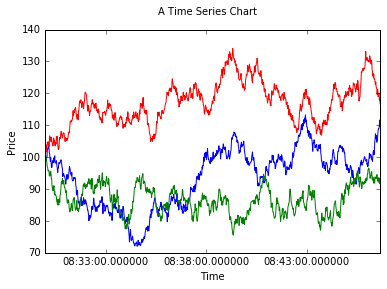

In [5]:
plot_ts(prices)

Let us look at what other options we have for stylesheets.

In [6]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


Now these are all the themes that are installed on my system. Some of these are for [seaborn](http://seaborn.pydata.org/) which is another well-known plotting package for Python. It is built as a wrapper on top of [matplotlib](http://matplotlib.org/).

I will try the [matplotlib](http://matplotlib.org/) ones and see how it changes our graph. 

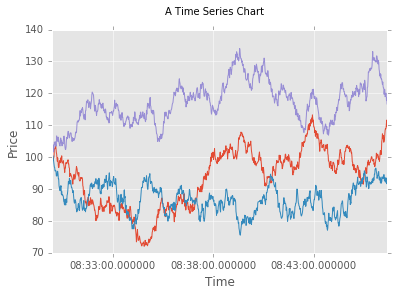

In [7]:
plt.style.use("ggplot")
plot_ts(prices)

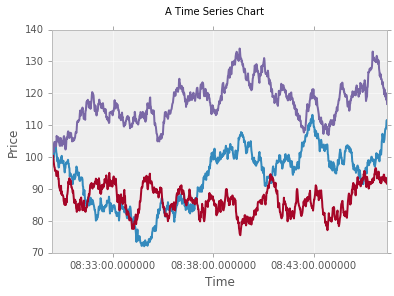

In [8]:
plt.style.use("bmh")
plot_ts(prices)

Now depends if one of these options work for you or not. I didn't for me and I wanted something different.

First thing I did was find a good pallete of colors. I did that even before I was deciding on how I wanted my charts to look. One great resource for finding or creating a good pallete is [Paletton](http://paletton.com/).

In [9]:
%%HTML
<img src="./paletton1.png">

In [10]:
%%HTML
<img src="./paletton2.png">

Using these, I created a new mplstyle file [kapilsh.mplstyle](./kapilsh.mplstyle) which looks like this. 

```
patch.linewidth: 0.5
patch.facecolor: 348ABD
patch.edgecolor: EEEEEE
patch.antialiased: True

font.size: 10.0

axes.facecolor: D5D5D5
axes.edgecolor: black
axes.linewidth: 1
axes.grid: True
axes.titlesize: large
axes.labelsize: medium
axes.labelcolor: black
axes.axisbelow: True

axes.prop_cycle: cycler('color', ['5E4F6D', 'A18271', '4B6B61', 'A19E71', '623F2C', '312142','1D4136', '625F2C'])

xtick.color: black
xtick.direction: out

ytick.color: black
ytick.direction: out

grid.color: white
grid.linestyle: -

figure.facecolor: white
figure.edgecolor: 0.75
figure.figsize: 12, 10
figure.autolayout: False

```

For the properties, you can look at your [matplotlibrc](http://matplotlib.org/users/customizing.html) file. 

Let's use this.

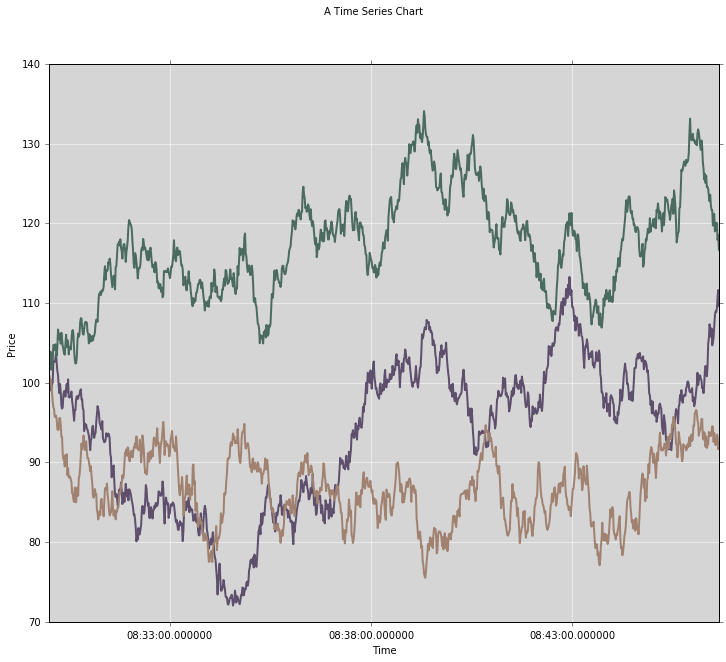

In [11]:
plt.style.use("kapilsh.mplstyle")
plot_ts(prices)

Let us draw some other graphs using our new stylesheet!

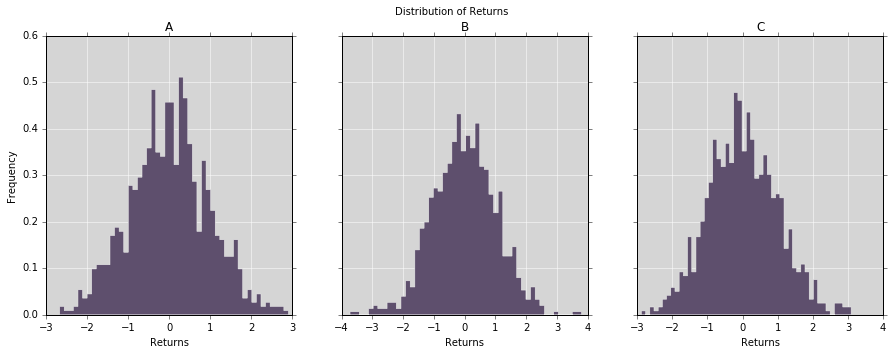

In [12]:
fig, ax_arr = plt.subplots(ncols=3, nrows=1, sharey=True)
ax = ax_arr[0]
n, bins, patches = ax.hist(returns["A"], 50, normed=1, histtype='stepfilled')
ax.set_ylabel("Frequency")
ax.set_xlabel("Returns")
ax.set_title("A")
ax = ax_arr[1]
n, bins, patches = ax.hist(returns["B"], 50, normed=1, histtype='stepfilled')
ax.set_xlabel("Returns")
ax.set_title("B")
ax = ax_arr[2]
n, bins, patches = ax.hist(returns["C"], 50, normed=1, histtype='stepfilled')
ax.set_xlabel("Returns")
ax.set_title("C")
plt.suptitle("Distribution of Returns")
plt.gcf().set_size_inches(15, 5)
plt.show()

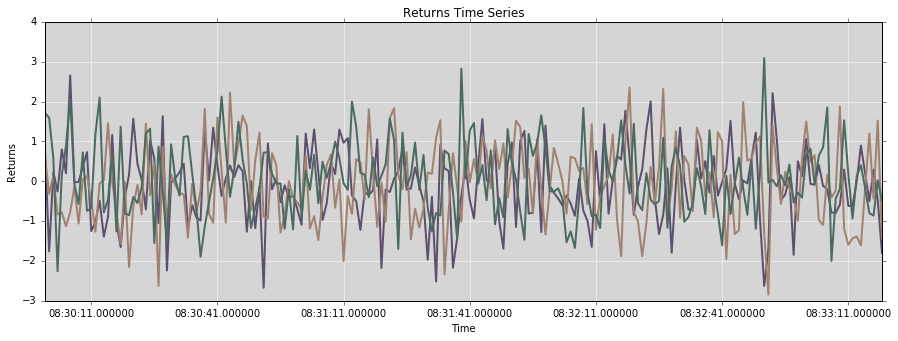

In [50]:
returns_sample = returns[:200]

fig, ax = plt.subplots()
ax.plot_date(returns_sample.index.values, returns_sample["A"], '-')
ax.plot_date(returns_sample.index.values, returns_sample["B"], '-')
ax.plot_date(returns_sample.index.values, returns_sample["C"], '-')
ax.set_ylabel("Returns")
ax.set_xlabel("Time")
ax.set_title("Returns Time Series")
plt.gcf().set_size_inches(15, 5)
plt.show()

Now we have customized our matplotlib through a single stylesheet. 